# Global Sensivity Analysis
This notebook contains analysis of the global sensitivity analysis performed 
on a fuel cycle transition from US fleet of Light Water Reactors to a fleet 
of advanced reactors. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
files = {'xe100':{'gaussian':'xe100_share/xe100_share_gaussian.dat',
                  'list':'xe100_share/xe100_share_list.dat',
                  'quadratic':'xe100_share/xe100_share_quadratic.dat'},
        'mmr':{'gaussian':'mmr_share/mmr_share_gaussian.dat',
                  'list':'mmr_share/mmr_share_list.dat',
                  'quadratic':'mmr_share/mmr_share_quadratic.dat'},
        'voygr':{'gaussian':'voygr_share/voygr_share_gaussian.dat',
                  'list':'voygr_share/voygr_share_list.dat',
                  'quadratic':'voygr_share/voygr_share_quadratic.dat'}}
units = {'x':['(%)','(%)','(MWd/kgU)'],
         'y':['(kg)','(kg)','(kg-SWU)','(kg-SWU)', '(kg)']}
labels = {'enr_u':'Enriched uranium mass', 'haleu':"HALEU mass", 'swu': 'SWU capacity',
          'haleu_swu':"HALEU SWU capacity", 'waste':'SNF mass',
         'lwr':"LWR Lifetimes", 'xe100_share':"Xe-100 build share", 
         'mmr_share':'MMR build share', 'voygr_share':'VOYGR build share',
         'xe100_burnup':'Xe-100 burnup'}

## Xe-100 Share

In [3]:
xe100_data = {}
for key in files['xe100']:
    xe100_data[key] = pd.read_csv(files['xe100'][key], sep="\s+", header = 0)

/tmp/ipykernel_324/1812689793.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


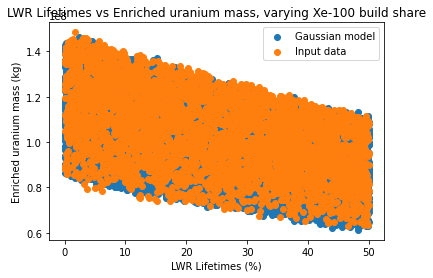

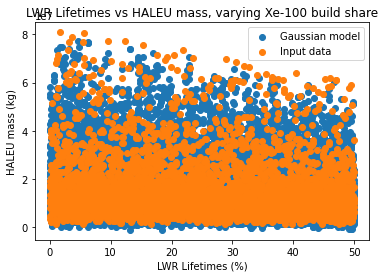

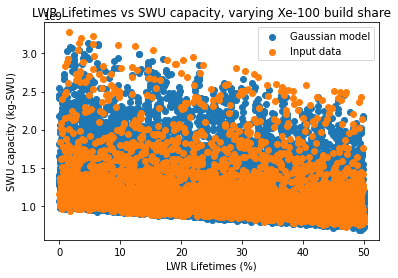

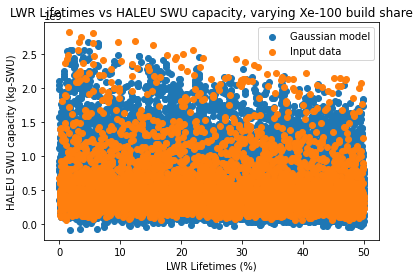

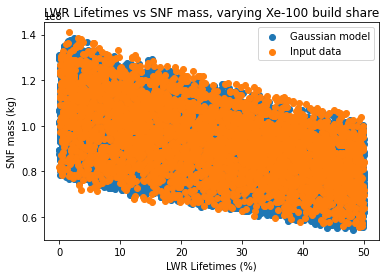

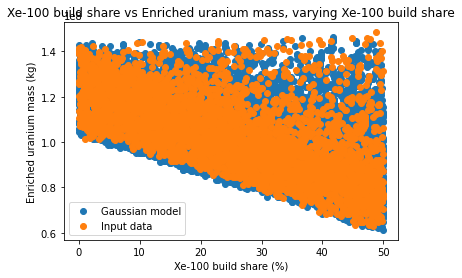

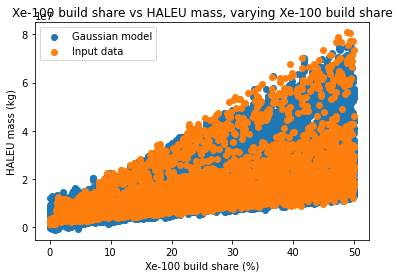

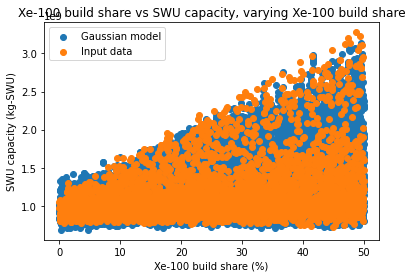

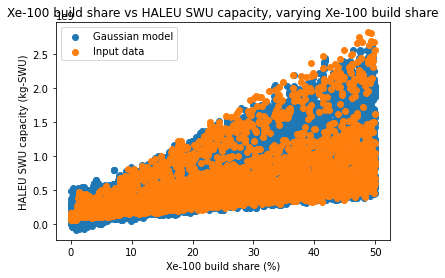

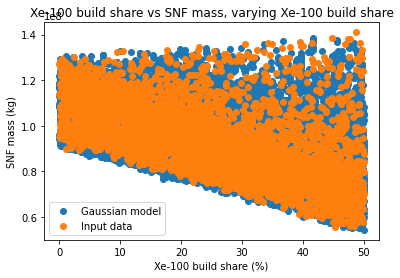

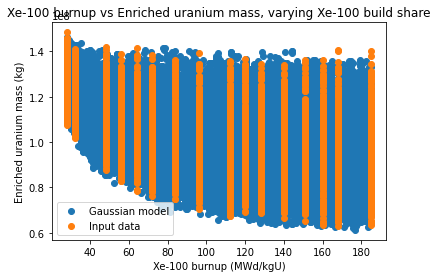

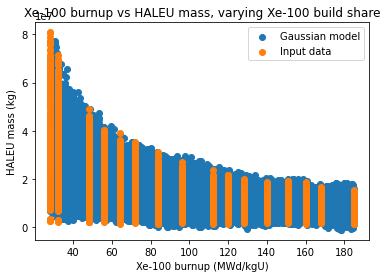

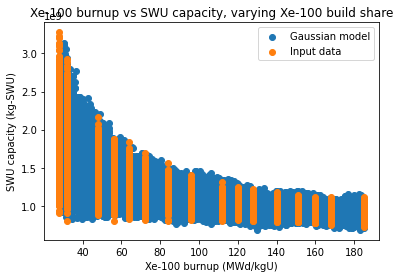

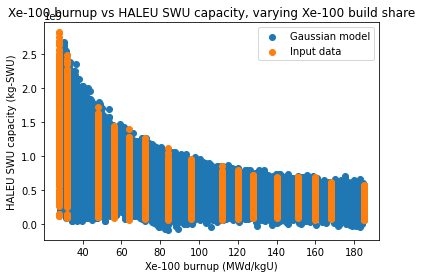

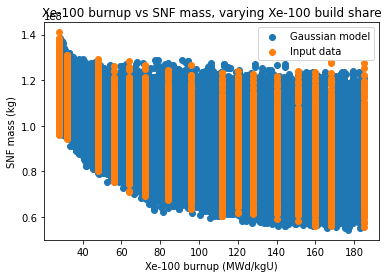

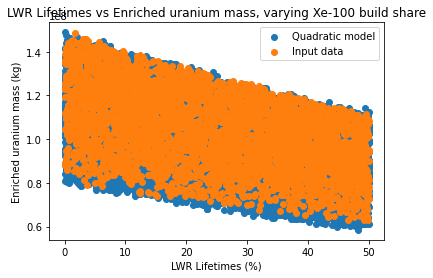

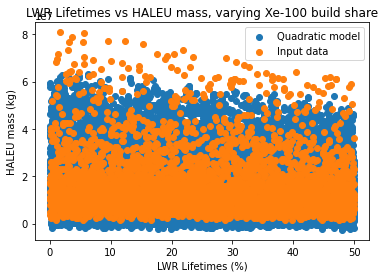

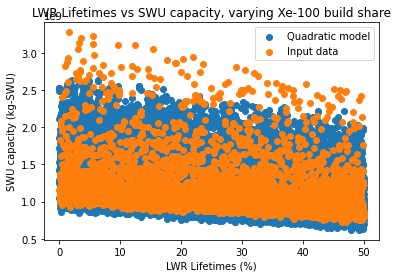

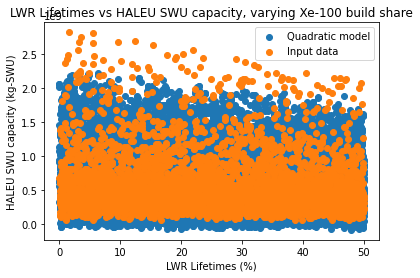

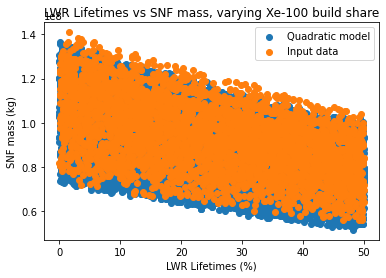

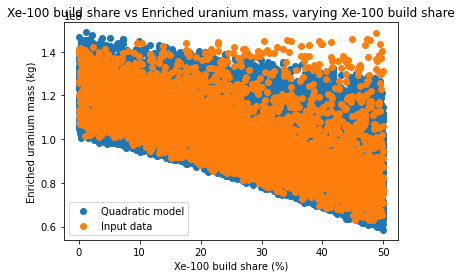

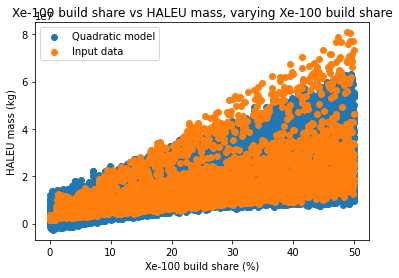

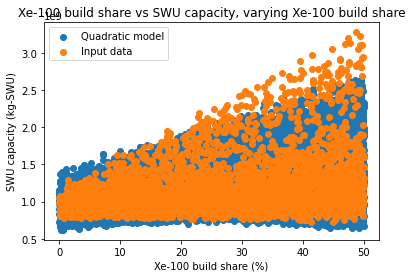

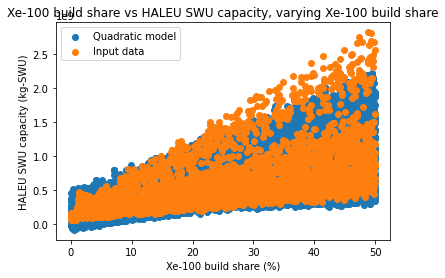

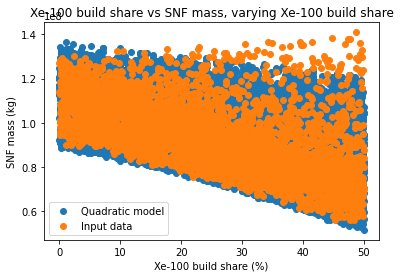

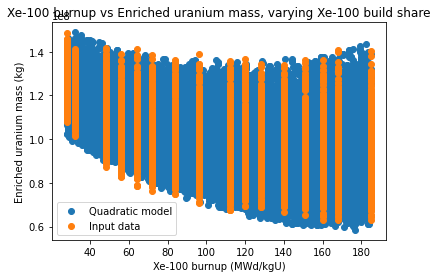

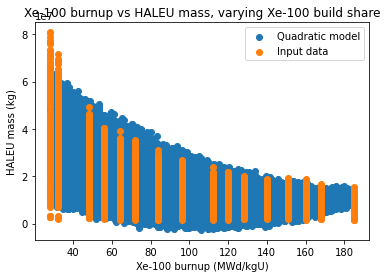

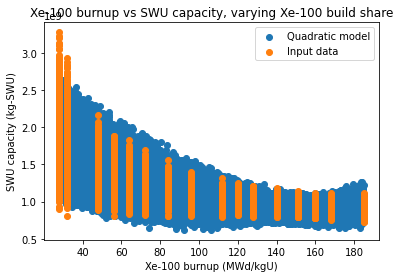

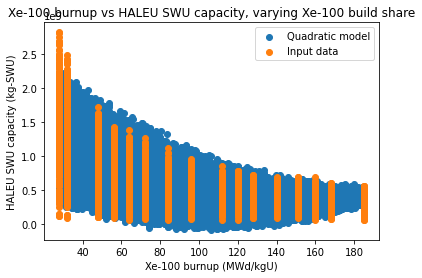

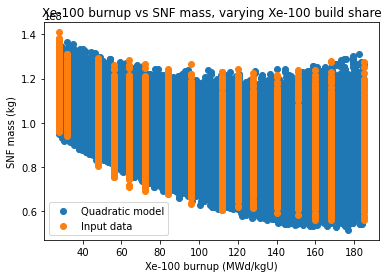

In [4]:
for key in ['gaussian', 'quadratic']:
    counter = 0
    for p_index, parameter in enumerate(['lwr','xe100_share','xe100_burnup']):
        for m_index, metric in enumerate(['enr_u','haleu','swu','haleu_swu','waste']):
            plt.figure()
            plt.scatter(xe100_data[key][parameter], xe100_data[key][metric], label=f"{key.capitalize()} model")
            plt.scatter(xe100_data['list'][parameter], xe100_data['list'][metric], label='Input data')
            plt.xlabel(f"{labels[parameter]} {units['x'][p_index]}")
            plt.ylabel(f"{labels[metric]} {units['y'][m_index]}")
            plt.title(f"{labels[parameter]} vs {labels[metric]}, varying Xe-100 build share")
            plt.legend()
            plt.savefig(f"figures/xe100_share_{key}_{parameter}_{metric}.pdf")

In [5]:
xe100_data['gaussian']['haleu'].min()

-1050806.767

## MMR Share

In [6]:
mmr_data = {}
for key in files['mmr']:
    mmr_data[key] = pd.read_csv(files['mmr'][key], sep="\s+", header = 0)

/tmp/ipykernel_324/2498921415.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


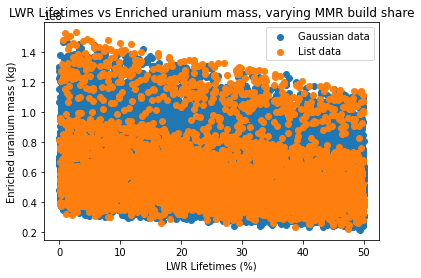

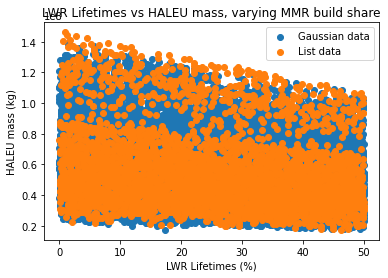

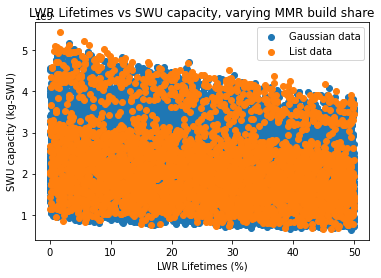

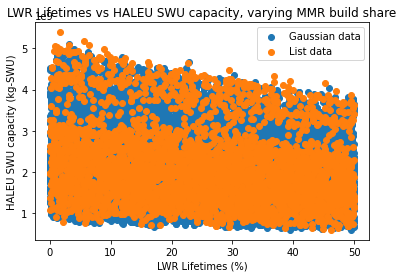

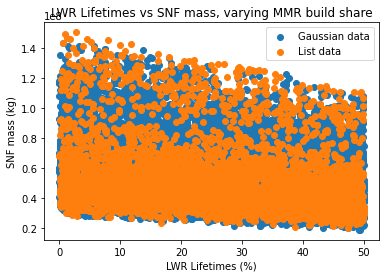

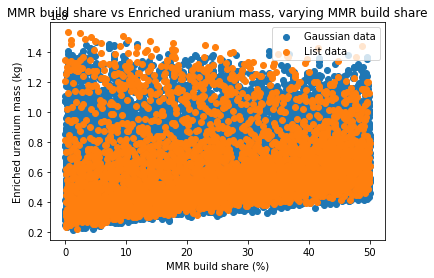

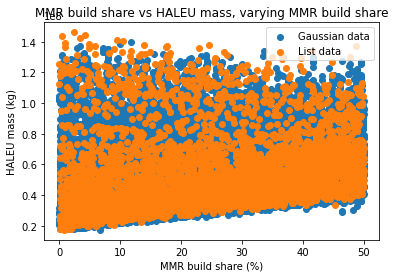

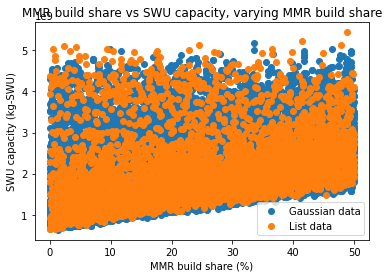

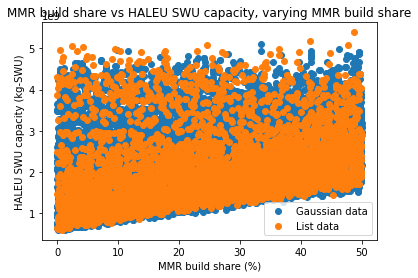

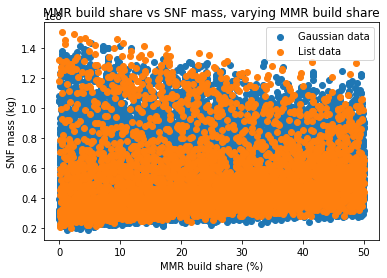

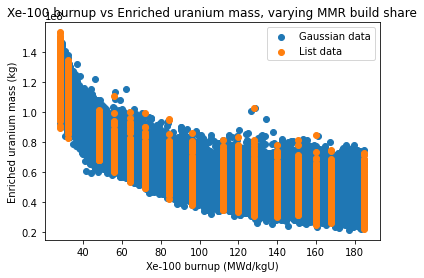

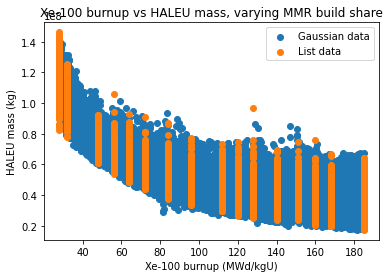

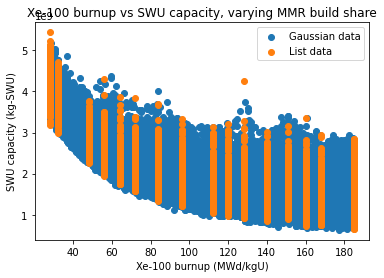

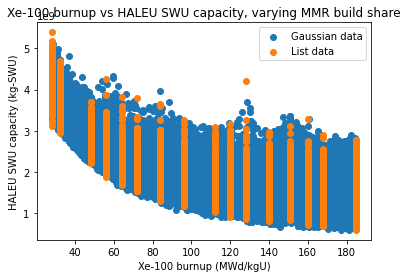

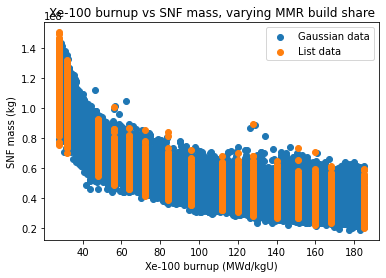

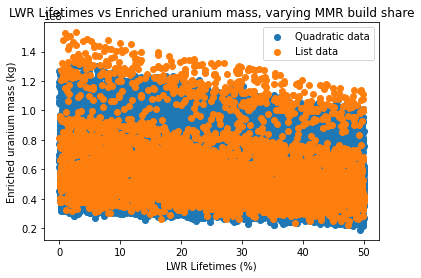

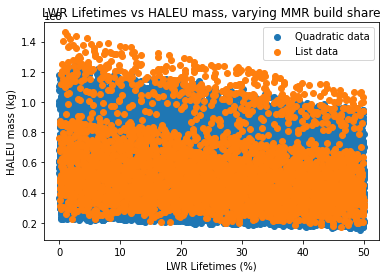

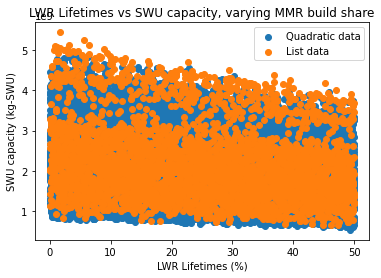

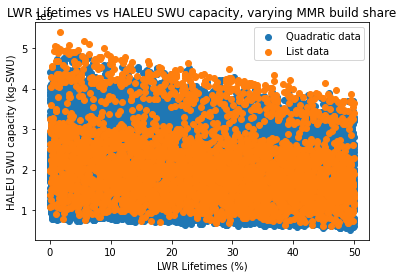

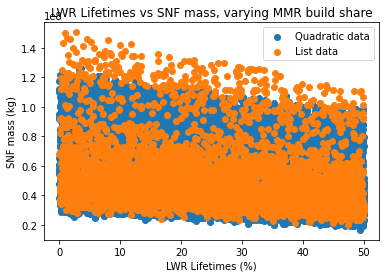

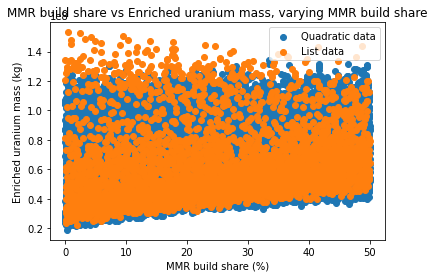

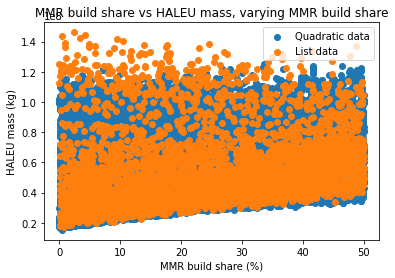

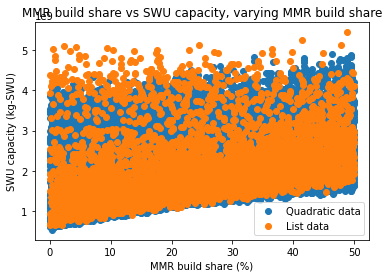

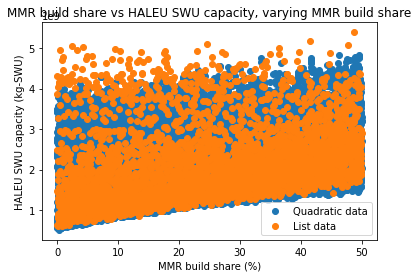

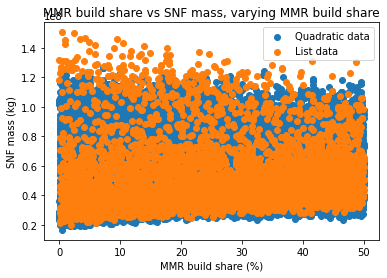

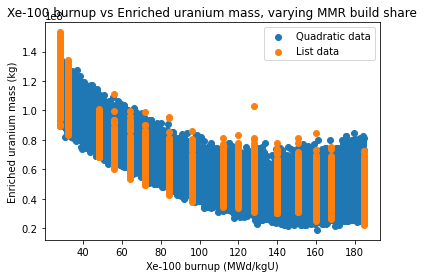

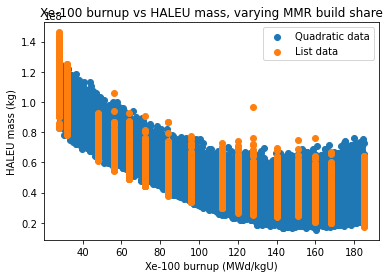

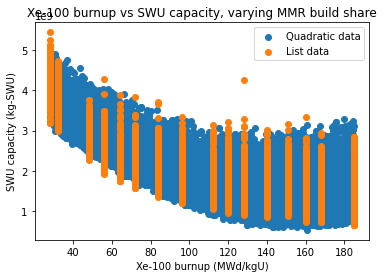

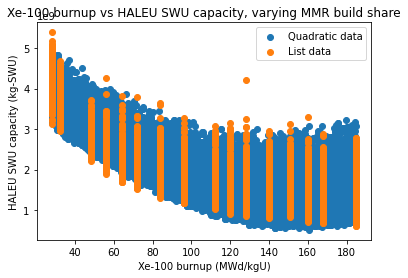

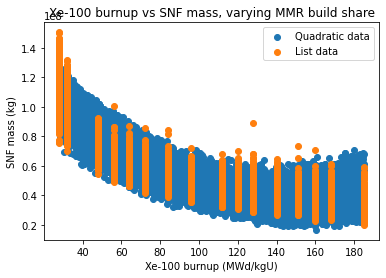

In [7]:
for key in ['gaussian', 'quadratic']:
    counter = 0
    for p_index, parameter in enumerate(['lwr','mmr_share','xe100_burnup']):
        for m_index, metric in enumerate(['enr_u','haleu','swu','haleu_swu','waste']):
            plt.figure()
            plt.scatter(mmr_data[key][parameter], mmr_data[key][metric], label=f"{key.capitalize()} data")
            plt.scatter(mmr_data['list'][parameter], mmr_data['list'][metric], label='List data')
            plt.xlabel(f"{labels[parameter]} {units['x'][p_index]}")
            plt.ylabel(f"{labels[metric]} {units['y'][m_index]}")
            plt.title(f"{labels[parameter]} vs {labels[metric]}, varying MMR build share")
            plt.legend()
            plt.savefig(f"figures/mmr_share_{key}_{parameter}_{metric}.pdf")

## VOYGR Share

In [8]:
voygr_files = {'gaussian':'voygr_share/voygr_share_gaussian.dat',
               'list':'voygr_share/voygr_share_list.dat',
               'quadratic':'voygr_share/voygr_share_quadratic.dat'}
voygr_data = {}
for key in voygr_files:
    voygr_data[key] = pd.read_csv(voygr_files[key], sep="\s+", header = 0)

/tmp/ipykernel_324/1774093493.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


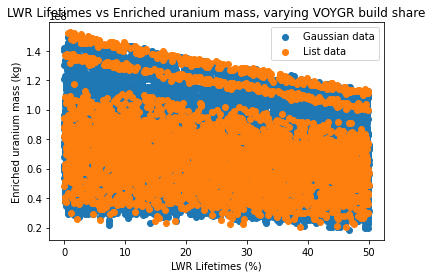

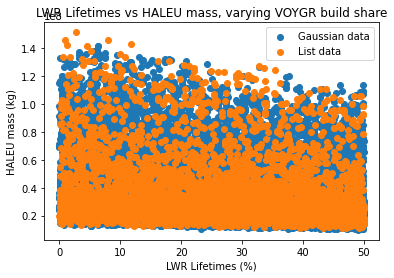

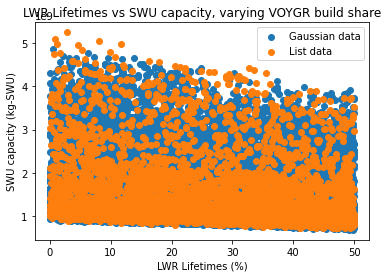

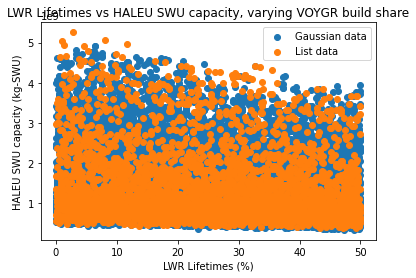

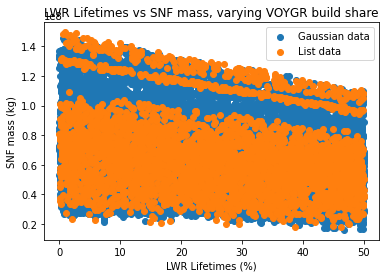

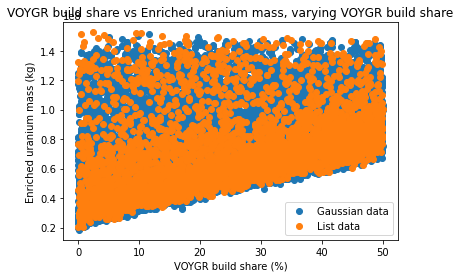

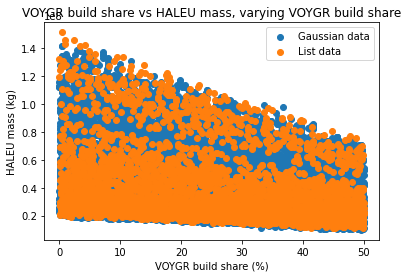

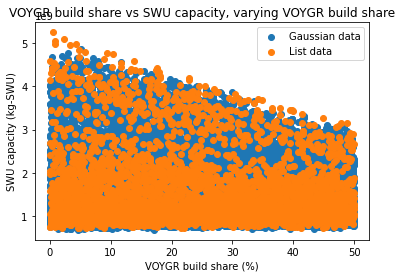

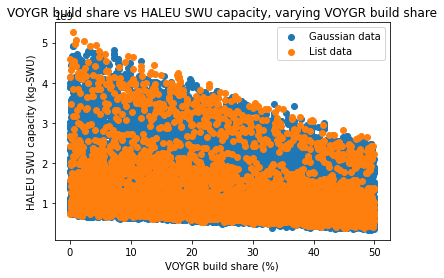

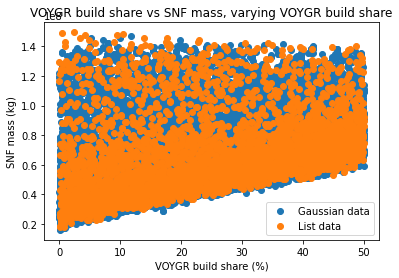

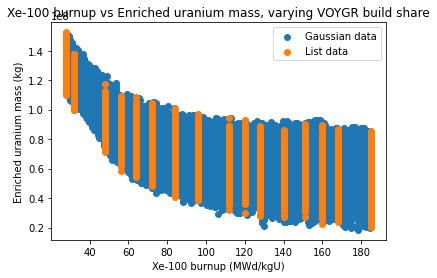

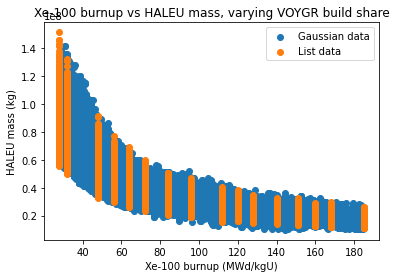

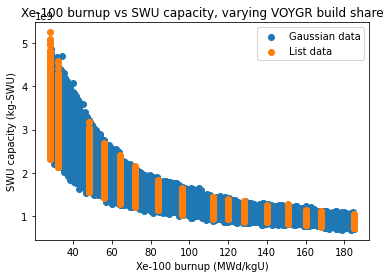

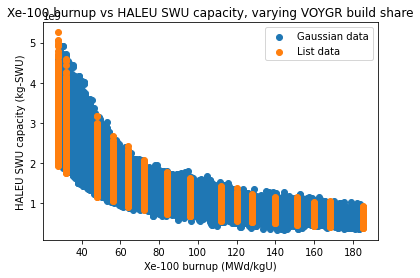

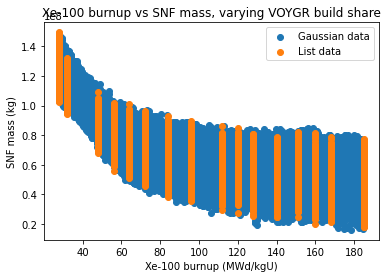

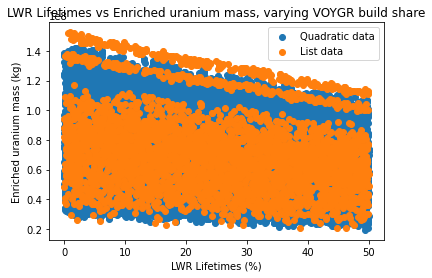

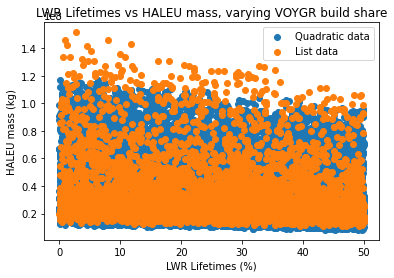

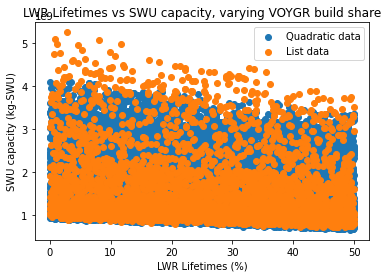

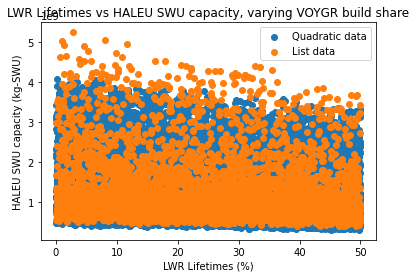

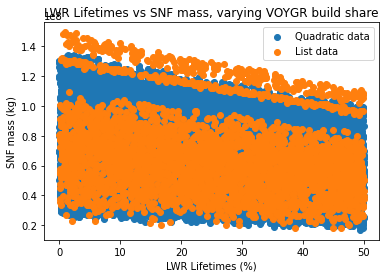

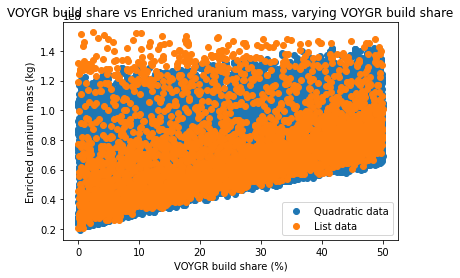

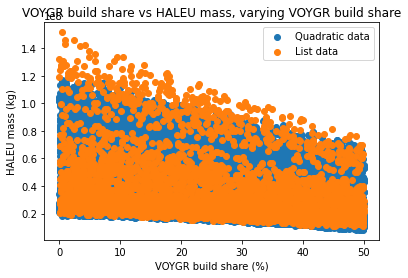

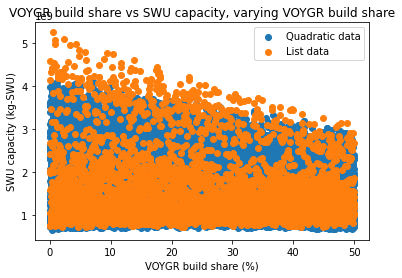

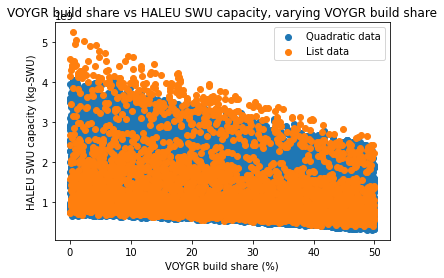

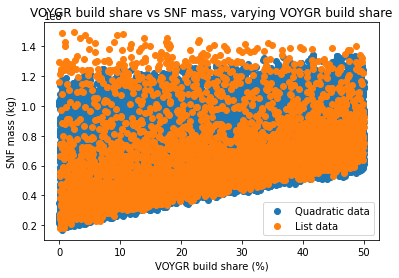

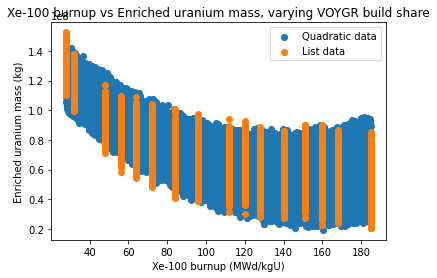

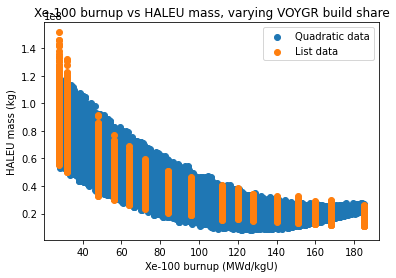

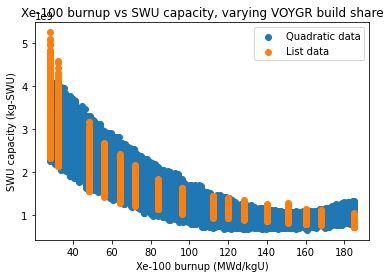

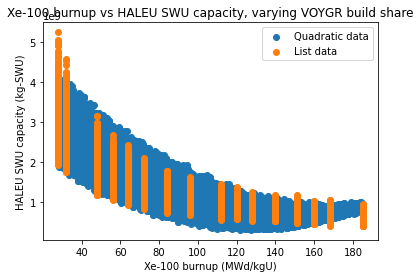

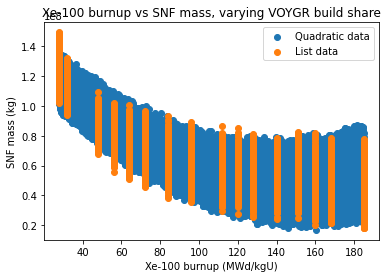

In [9]:
for key in ['gaussian', 'quadratic']:
    counter = 0
    for p_index, parameter in enumerate(['lwr','voygr_share','xe100_burnup']):
        for m_index, metric in enumerate(['enr_u','haleu','swu','haleu_swu','waste']):
            plt.figure()
            plt.scatter(voygr_data[key][parameter], voygr_data[key][metric], label=f"{key.capitalize()} data")
            plt.scatter(voygr_data['list'][parameter], voygr_data['list'][metric], label='List data')
            plt.xlabel(f"{labels[parameter]} {units['x'][p_index]}")
            plt.ylabel(f"{labels[metric]} {units['y'][m_index]}")
            plt.title(f"{labels[parameter]} vs {labels[metric]}, varying VOYGR build share")
            plt.legend()
            plt.savefig(f"figures/voygr_share_{key}_{parameter}_{metric}.pdf")